In [3]:
file_names = {0.49: 'data_omm_049.npz', 0.33: 'data_omm_033.npz'}

/var/folders/2d/zqs_vr2n65q9fsqw5kq8wmqw0000gn/T/ipykernel_39722/2540502316.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])


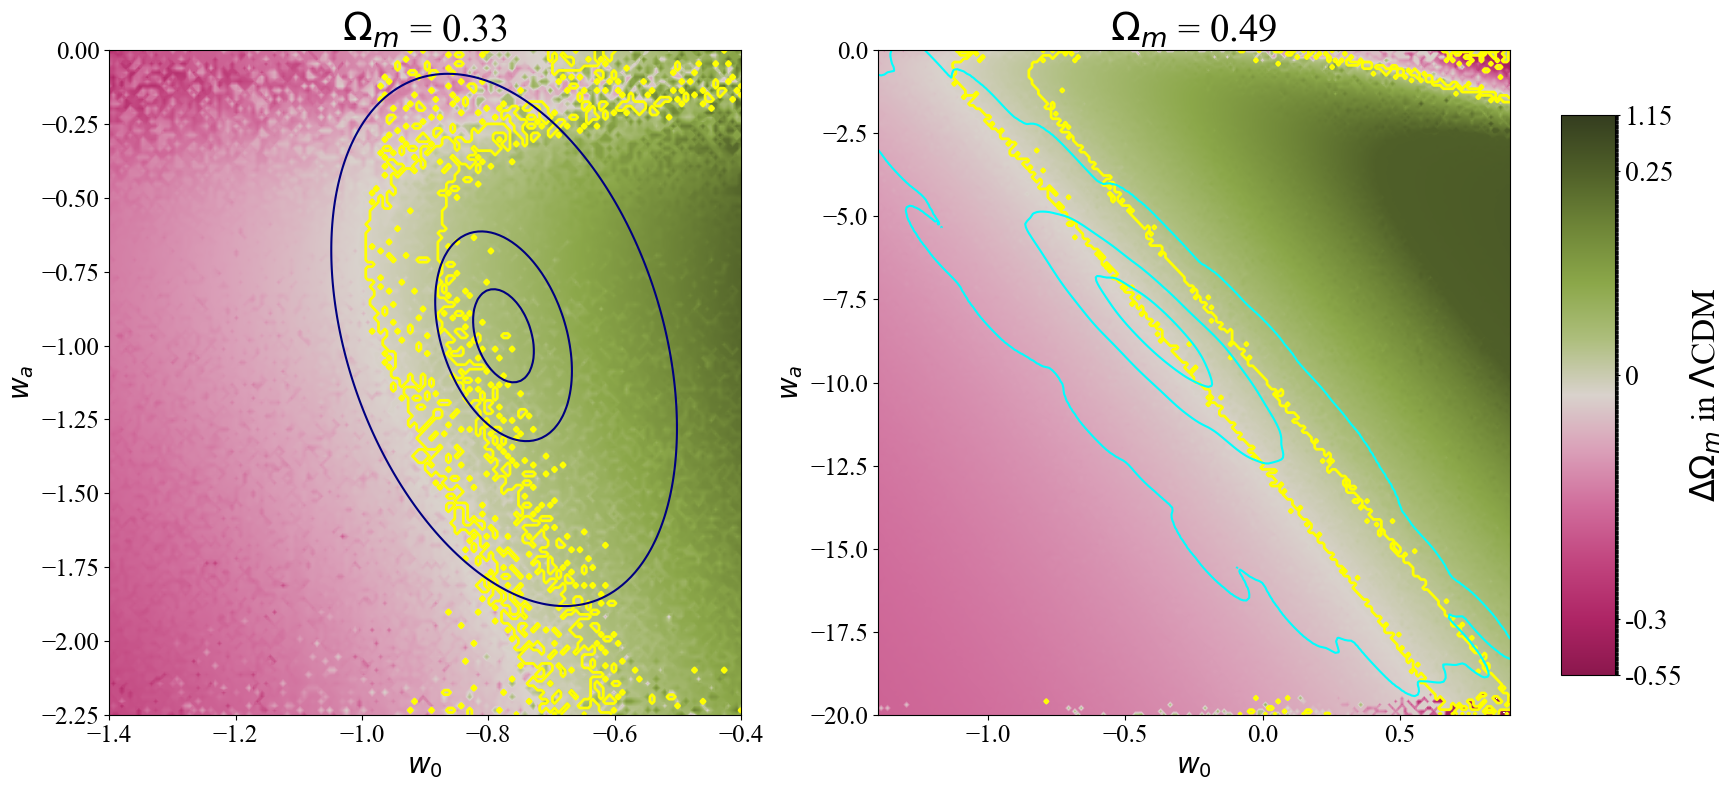

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from momacolors import colors as moma_colors
from matplotlib.patches import ConnectionPatch

plt.rc('font', family='serif', serif='Times New Roman')

def plot_combined_omm():
    # Load data for 0.49
    data_049 = np.load(file_names[0.49])
    w0_range_049 = data_049['w0_range']
    wa_range_049 = data_049['wa_range']
    delta_omm_grid_049 = data_049['delta_omm_grid']
    z_slice_sne_049 = data_049['z_slice_sne']
    
    data_033 = np.load(file_names[0.33])
    w0_range_033 = data_033['w0_range']
    wa_range_033 = data_033['wa_range']
    delta_omm_grid_033 = data_033['delta_omm_grid']
    z_slice_sne_bao_cmb_033 = data_033['z_slice_sne_bao_cmb']
    
    w0_grid_049, wa_grid_049 = np.meshgrid(w0_range_049, wa_range_049)
    w0_grid_033, wa_grid_033 = np.meshgrid(w0_range_033, wa_range_033)

    picasso_cmap = moma_colors.get_colormap("Kippenberger", n=1000)

    a = -0.55
    b = -0.3
    c = 0.25
    d =1.15

    colors1 = picasso_cmap(np.linspace(0, 0.1, 100))  # First 100 colors (from a to b)
    colors2 = picasso_cmap(np.linspace(0.1, 0.9, 800))  # Next 800 colors (from b to c)
    colors3 = picasso_cmap(np.linspace(0.9, 1.0, 100))  # Last 100 colors (from c to d)

    all_colors = np.vstack([colors1, colors2, colors3])

    custom_cmap = colors.ListedColormap(all_colors)

    boundaries1 = np.linspace(a, b, 101)  
    boundaries2 = np.linspace(b, c, 801)  
    boundaries3 = np.linspace(c, d, 101)  

    boundaries = np.concatenate([boundaries1, boundaries2[1:], boundaries3[1:]])

    norm = colors.BoundaryNorm(boundaries, custom_cmap.N, clip=True)

    fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=False)

    ax1 = axes[1]
    c1 = ax1.contourf(w0_grid_049, wa_grid_049, delta_omm_grid_049, levels=boundaries, cmap=custom_cmap, norm=norm)

    highlight_mask_049 = (delta_omm_grid_049 >= -0.02) & (delta_omm_grid_049 <= 0.02)
    contour_levels_sne_049 = np.quantile(z_slice_sne_049, [0.68, 0.95, 0.99])
    ax1.contour(w0_grid_049, wa_grid_049, highlight_mask_049, levels=[0.5], colors='yellow', linewidths=2)
    ax1.contour(w0_grid_049, wa_grid_049, z_slice_sne_049, levels=contour_levels_sne_049, colors='cyan')
    #ax1.set_title(r"Heatmap of $\Delta \Omega_m$ for $\Omega_m$ = 0.49" "\n yellow:  $\Delta \Omega_m$ : [-0.01,0.01] \n red: SN_emcee chain ($\Omega_m$ =0.49 (+0.03)(-0.04))", y=1.03)
    ax1.set_title(r"$\Omega_m$ = 0.49", fontsize=28)
    ax1.set_xlabel(r"$w_0$", fontsize=20)
    ax1.set_ylabel(r"$w_a$", fontsize=20)
    
    ax2 = axes[0]
    c2 = ax2.contourf(w0_grid_033, wa_grid_033, delta_omm_grid_033, levels=boundaries, cmap=custom_cmap, norm=norm)

    highlight_mask_033 = (delta_omm_grid_033 >= -0.02) & (delta_omm_grid_033 <= 0.02)
    contour_levels_sne_bao_cmb_033 = np.quantile(z_slice_sne_bao_cmb_033, [0.68, 0.95, 0.99])
    ax2.contour(w0_grid_033, wa_grid_033, highlight_mask_033, levels=[0.5], colors='yellow', linewidths=2)
    ax2.contour(w0_grid_033, wa_grid_033, z_slice_sne_bao_cmb_033, levels=contour_levels_sne_bao_cmb_033, colors='navy')
    #ax2.set_title(r"Heatmap of $\Delta \Omega_m$ for $\Omega_m$ = 0.33" "\n yellow:  $\Delta \Omega_m$ : [-0.01,0.01] \n  blue: planck+SN+eBOSS+3x2pt ($\Omega_m$ =0.33 (+0.03)(-0.03))", y=1.03)
    ax2.set_title(r"$\Omega_m$ = 0.33", fontsize=28)
    ax2.set_xlabel(r"$w_0$", fontsize=20)
    ax2.set_ylabel(r"$w_a$", fontsize=20)

    
    rect_w0_min, rect_w0_max = -1.4, -0.4
    rect_wa_min, rect_wa_max = -2.25, 0.0
 #  ax1.plot([rect_w0_min, rect_w0_max, rect_w0_max, rect_w0_min, rect_w0_min],
 #            [rect_wa_min, rect_wa_min, rect_wa_max, rect_wa_max, rect_wa_min],
 #            linestyle='--', color='grey', linewidth=5) 
    
  #  ax2.plot([rect_w0_min, rect_w0_min], [rect_wa_min, rect_wa_min],
#             linestyle='--', color='grey', linewidth=5)
#    ax2.plot([rect_w0_max, rect_w0_max], [rect_wa_min, rect_wa_min],
 #            linestyle='--', color='grey', linewidth=5)
    
#    ax1.plot([rect_w0_min, rect_w0_min], [rect_wa_min, rect_wa_min],
             #linestyle='--', color='grey', linewidth=5)
 #   ax1.plot([rect_w0_max, rect_w0_max], [rect_wa_min, rect_wa_min],
            # linestyle='--', color='grey', linewidth=5)

#    ax2.plot([rect_w0_min, rect_w0_min], [rect_wa_min, rect_wa_min], 'o', color='grey', markersize=8)
 #   ax2.plot([rect_w0_max, rect_w0_max], [rect_wa_min, rect_wa_min], 'o', color='grey', markersize=8)
    
    ax1.tick_params(axis='both', labelsize=18)
    ax2.tick_params(axis='both', labelsize=18)
    
    line1 = ConnectionPatch(xyA=(-0.4, -2.25), xyB=(-0.4, -2.25), coordsA="data", coordsB="data",
                            axesA=ax1, axesB=ax2, color="grey",linewidth=3,linestyle='--')
    
  #  fig.add_artist(line1)

    line2 = ConnectionPatch(xyA=(-1.4, 0.0), xyB=(-1.4, 0.0 ), coordsA="data", coordsB="data",
                            axesA=ax1, axesB=ax2, color="grey",linewidth=3,linestyle='--')
#    fig.add_artist(line2)
    
    fig.subplots_adjust(right=0.85) 
    cbar_ax = fig.add_axes([0.87, 0.15, 0.03, 0.7])  # [left, bottom, width, height]
    sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, cax=cbar_ax)
    cbar.set_label(r'$\Delta \Omega_m$ in $\Lambda$CDM', fontsize=24)
    cbar.set_ticks([a, b, 0, c, d])
    cbar.set_ticklabels([f'{a:.2f}', '-0.3', '0', '0.25', f'{d:.2f}'])
    cbar.ax.tick_params(labelsize=20)  # Increase colorbar tick size


    plt.tight_layout(rect=[0, 0, 0.85, 1])
    
    plt.savefig('heat_differ_omm.png', dpi=300, bbox_inches='tight')

    plt.show()

plot_combined_omm()
